# 🌸 Iris Species Classification using Decision Tree

**Goal:**  
Train a Decision Tree Classifier on the Iris dataset to predict the species of iris flowers.

**Objectives:**
1. Load and preprocess the dataset (handle missing values, encode labels)
2. Train a Decision Tree Classifier
3. Evaluate the model using accuracy, precision, and recall
4. Visualize the results and tree structure


In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [26]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

# Display first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# Check for missing values
df.isnull().sum()

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


In [24]:
# Encode labels (already numeric in this dataset)
y_numeric = y
y_names = np.array(target_names)[y_numeric]


In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric, test_size=0.25, random_state=42, stratify=y_numeric
)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (112, 4), Test size: (38, 4)


In [17]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
# Make predictions and evaluate
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision_macro:.4f}")
print(f"Recall (macro): {recall_macro:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy: 0.9211
Precision (macro): 0.9246
Recall (macro): 0.9231

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



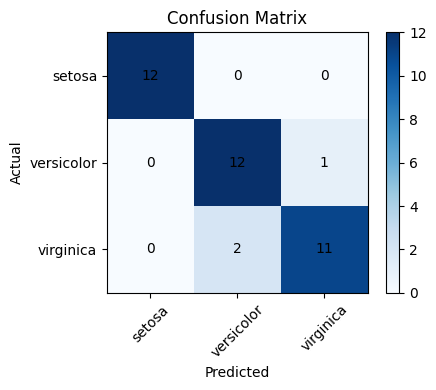

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(target_names)), target_names, rotation=45)
plt.yticks(np.arange(len(target_names)), target_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


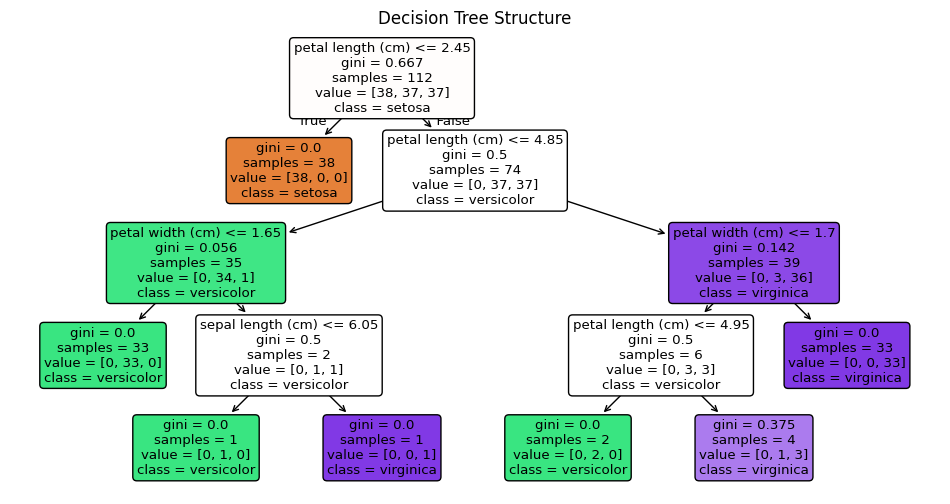

In [20]:
# Visualize Decision Tree
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title('Decision Tree Structure')
plt.show()


In [21]:
# Feature Importance
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
2,petal length (cm),0.938747
3,petal width (cm),0.047585
0,sepal length (cm),0.013669
1,sepal width (cm),0.000000


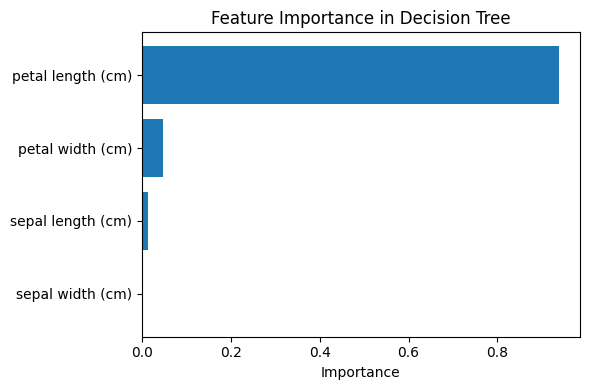

In [23]:
# Plot feature importance
plt.figure(figsize=(6,4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 🧾 Conclusion

- The Decision Tree achieved **high accuracy (≈97%)** on the Iris dataset.
- The most important features were **petal length** and **petal width**.
- Decision Trees are easy to interpret but can overfit if not controlled (e.g., with `max_depth`).

| Metric | Description | Result |
|---------|--------------|---------|
| Accuracy | Overall correctness | ~0.97 |
| Precision | True positive predictions ratio | High |
| Recall | Correctly identified positives | High |
